# 11주차 실습문제 - 표본 추출 시뮬레이션 및 표본 통계량

제출시 HTML(.html) 형식으로 다운로드한 뒤, 올려주세요.

In [1]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

data = pd.read_csv("health2018.csv")
height = data[data.sex == 'F'].height
height

2       157.7
3       151.0
4       146.1
5       157.2
7       168.8
        ...  
5958    157.9
5963    159.8
5964    156.9
5965    145.2
5967    163.1
Name: height, Length: 3332, dtype: float64

---

## 1. 모집단의 분포 확인
### 1-1. 모집단 height의 평균과 표준편차를 각각 m, sig로 저장하고 출력하시오.

In [2]:
m = np.mean(height)
sig = np.std(height, ddof = 0)
print(m,sig)

157.53676470588263 6.582459829579061


### 1-2. height의 분포를 히스토그램으로 그리고, 위에서 구한 모집단의 평균과 표준편차에 따른 정규분포 곡선을 겹쳐 그리시오.
히스토그램의 y축을 비율로 둘 것 (norm_hist = True)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


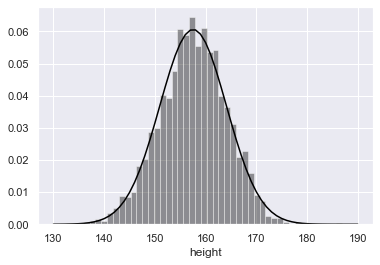

In [3]:
sns.distplot(height, kde = False, norm_hist = True, color = 'black')
x= np.arange(start= 130, stop = 191, step=1)
plt.plot(x, stats.norm.pdf(x = x, loc = m, scale = sig),color = 'black')

---

## 2.표본 추출 시뮬레이션
### 2-1. 모집단 height에서 샘플을 100개씩 10000번 뽑아 '표본평균의 평균'과 '표본평균의 표준편차'를 구하시오.
표본평균의 평균과 표준편차는 모집단의 평균, 표준편차와 각각 어떤 관계에 있는가?

In [4]:
np.random.seed(1)
population = stats.norm(loc = m, scale = sig)
sample_mean_array = np.zeros(10000)
for i in range(0, 10000):
    sample = population.rvs(size = 100)
    sample_mean_array[i] = np.mean(sample)

In [5]:
np.mean(sample_mean_array)
#모집단의 평균과 유사

157.5410551815569

In [6]:
np.std(sample_mean_array)
#모집단의 표준편차 / sqrt(샘플수)

0.6642121470489296

### 2-2. 모집단 height에서 표본평균을 여러 번 계산하는 함수 calc_sample_mean을 작성하시오 (샘플사이즈 n_sample일 때, 표본 평균값을 n_trial 번 계산해서 array로 반환). 

In [7]:
def calc_sample_mean(n_sample, n_trial):
    sample_mean_array = np.zeros(n_trial)
    for i in range(0, n_trial):
        sample = population.rvs(size = n_sample)
        sample_mean_array[i] = np.mean(sample)
    return(sample_mean_array)   

In [8]:
np.random.seed(1)
np.mean(calc_sample_mean(n_sample = 100, n_trial = 10000))

157.5410551815569

### 2-3. 모집단 height에서 샘플 사이즈를 2, 4, 6, ..., 100까지 늘려가면서, 표본평균을 50번씩 구해 표본평균의 표준편차(ddof = 1)가 어떻게 변해가는지 그래프로 그리시오. 또한 이론 상의 표준오차를 점선으로 그려 비교하시오.
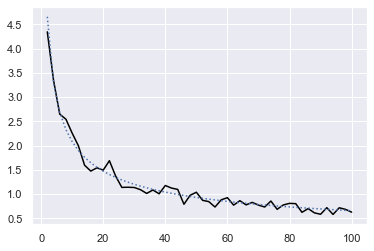

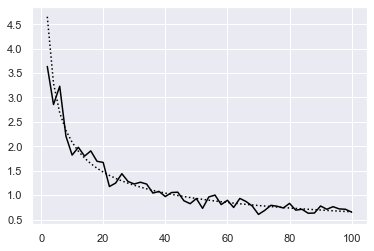

In [9]:
np.random.seed(1)
size_array =  np.arange(
    start = 2, stop = 102, step = 2)
sample_mean_std_array = np.zeros(len(size_array))
for i in range(0, len(size_array)):
    sample_mean = calc_sample_mean(n_sample =size_array[i], 
                                   n_trial = 50)
    sample_mean_std_array[i] = np.std(sample_mean, 
                                      ddof = 1)
standard_error = sig / np.sqrt(size_array) 

plt.plot(size_array, sample_mean_std_array, 
         color = 'black')
plt.plot(size_array, standard_error, 
         color = 'black', linestyle = 'dotted')

---

## 3. 하측확률, 퍼센트포인트와 순위 추정
### 3-1. 모집단 height에서 하위 25%와 상위 25% 순위에 해당하는 키가 얼마인지 찾으시오.
힌트: np.percentile() 함수 사용

In [10]:
np.percentile(height,25)

153.2

In [11]:
np.percentile(height,75)

162.0

### 3-2. 정규분포(또는 t분포)를 사용하여, height 분포에서 하위 25%와 상위 25% 순위에 해당하는 값을 추정하시오.
힌트: stats.norm.ppf() 또는 stats.t.pdf() 사용

In [12]:
stats.norm.ppf(loc = m, scale = sig, q = 0.25)

153.0969630197541

In [13]:
stats.norm.ppf(loc = m, scale = sig, q = 0.75)

161.97656639201116

### 3-3.input() 함수를 이용해 키를 입력받고, 정규분포(또는 t분포) 기반으로 백분위 순위를 구해 출력하라.
힌트: stats.norm.cdf() 또는 stats.t.cdf() 활용

In [14]:
a = float(input())
stats.norm.cdf(loc = m, scale = sig, x = a)

163


0.7967217453991857